In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.shape

(32560, 15)

In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [8]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

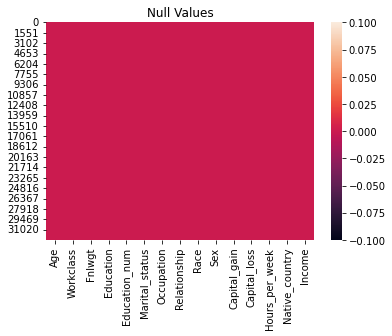

In [11]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [14]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [15]:
df.nunique().to_frame("No of unique values")

,No of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(32536, 15)

In [18]:
df_cc=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        df_cc.append(i)
print(df_cc)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [19]:
len(df_cc)

9

In [20]:
df_nc=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        df_nc.append(i)
print(df_nc)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [21]:
len(df_nc)

6

In [22]:
len(df.dtypes.index)==len(df_cc)+len(df_nc)

True

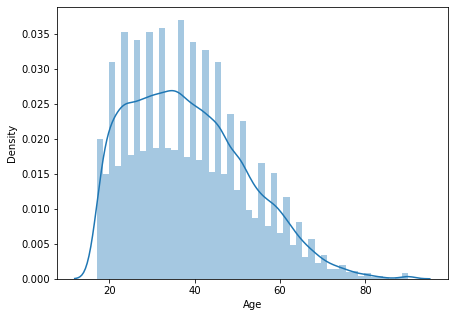

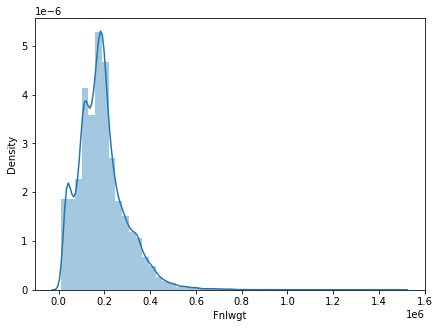

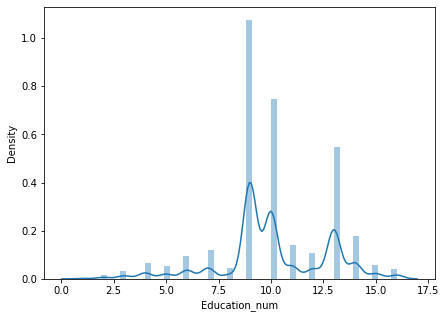

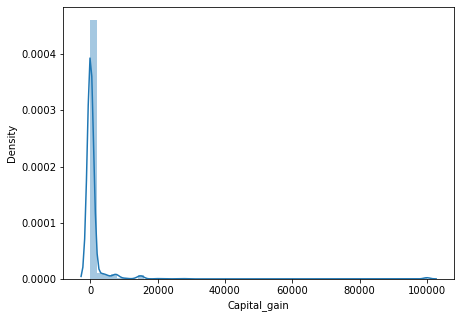

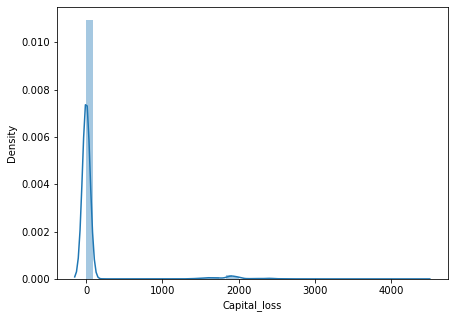

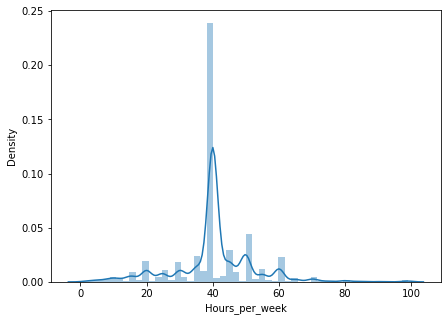

In [23]:
for i in df_nc:
    plt.figure(figsize=(7,5))
    sns.distplot(df[i],hist=True,kde=True)
    plt.show()

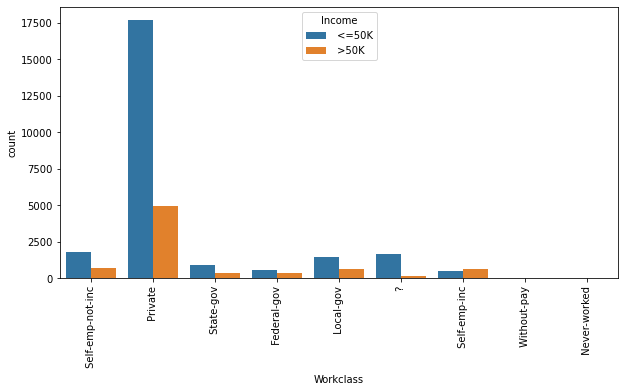

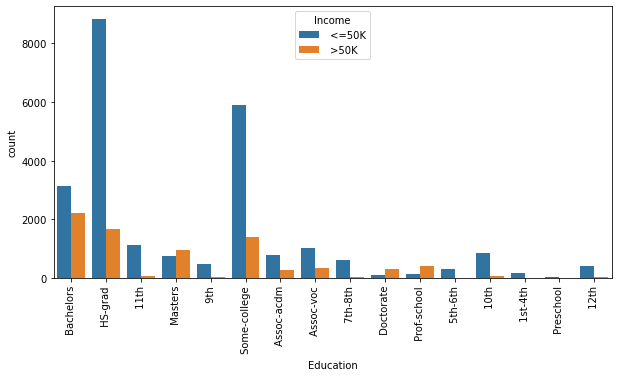

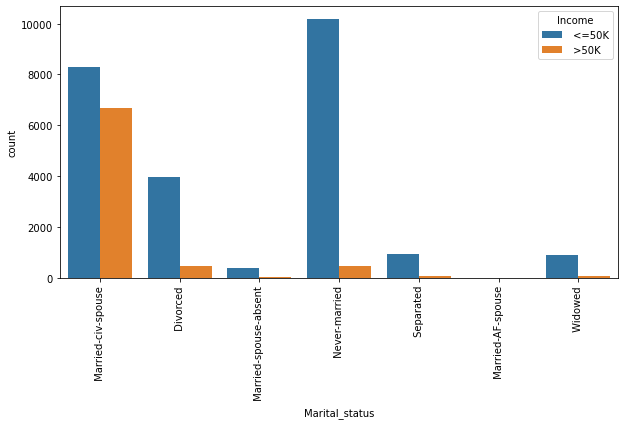

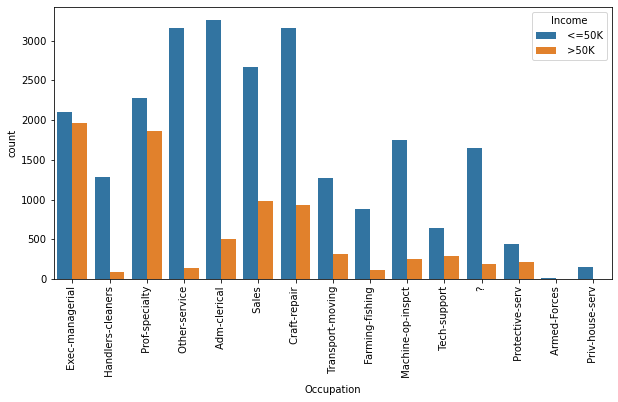

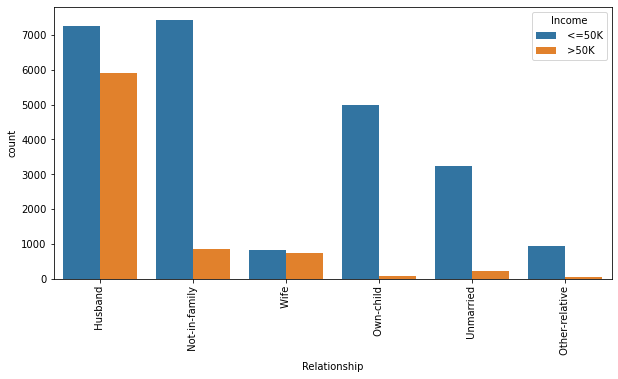

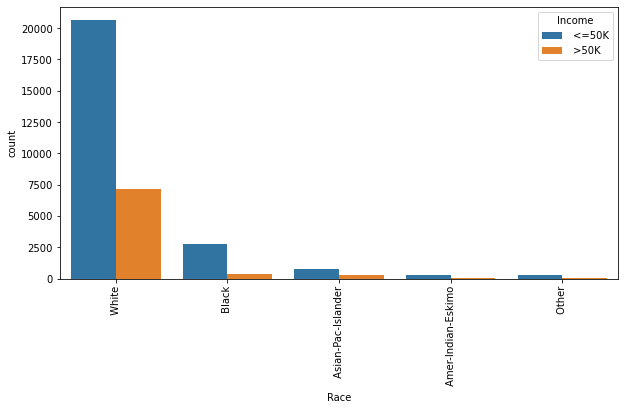

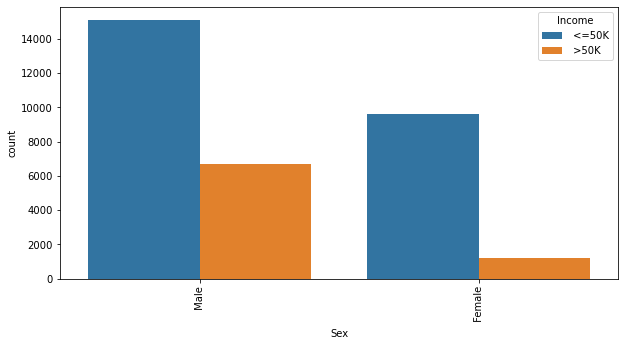

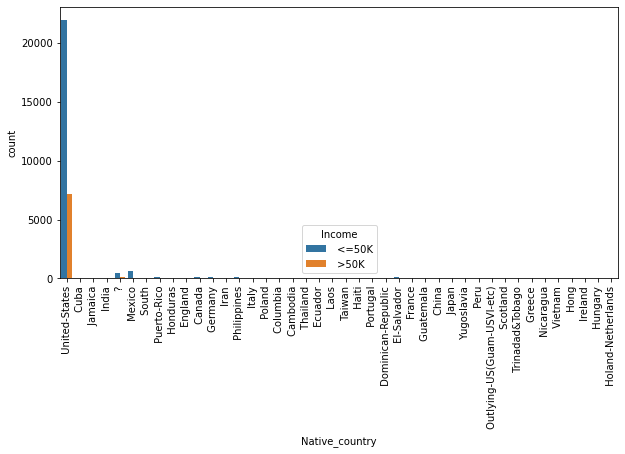

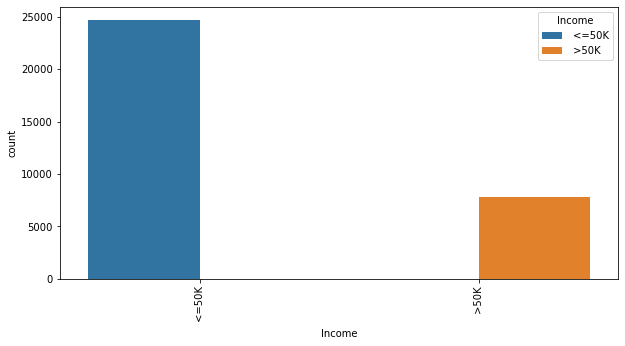

In [24]:
for i in df_cc:
    plt.figure(figsize=(10,5))
    chart = sns.countplot(x=i,data=df,hue='Income')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

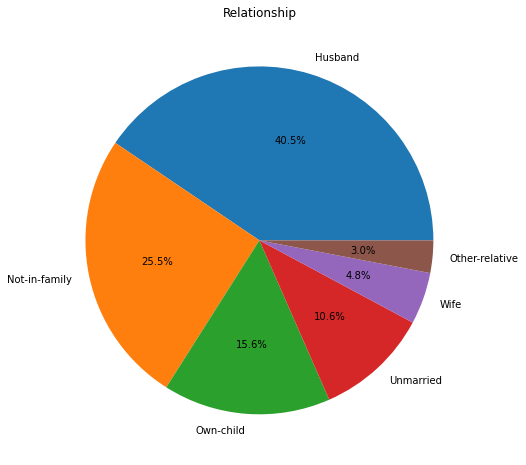

In [25]:
labels='Husband','Not-in-family','Own-child', 'Unmarried','Wife','Other-relative'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Relationship'].value_counts(),autopct='%1.1f%%', labels=labels)
plt.title('Relationship')
plt.show()

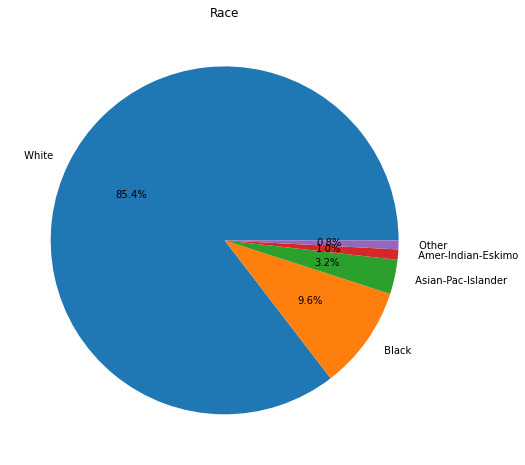

In [26]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Race')
ax.pie(df['Race'].value_counts(), labels=df['Race'].value_counts().index, autopct='%1.1f%%')
plt.show()

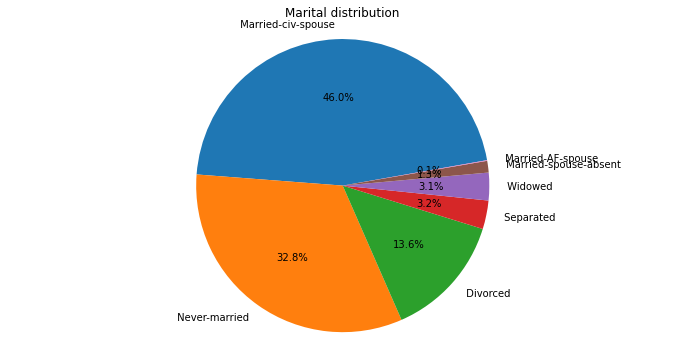

In [27]:
marital = df['Marital_status'].value_counts()
plt.figure(figsize=(12, 6))
plt.pie(marital.values, labels = marital.index, startangle=10, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.axis('equal')
plt.show()

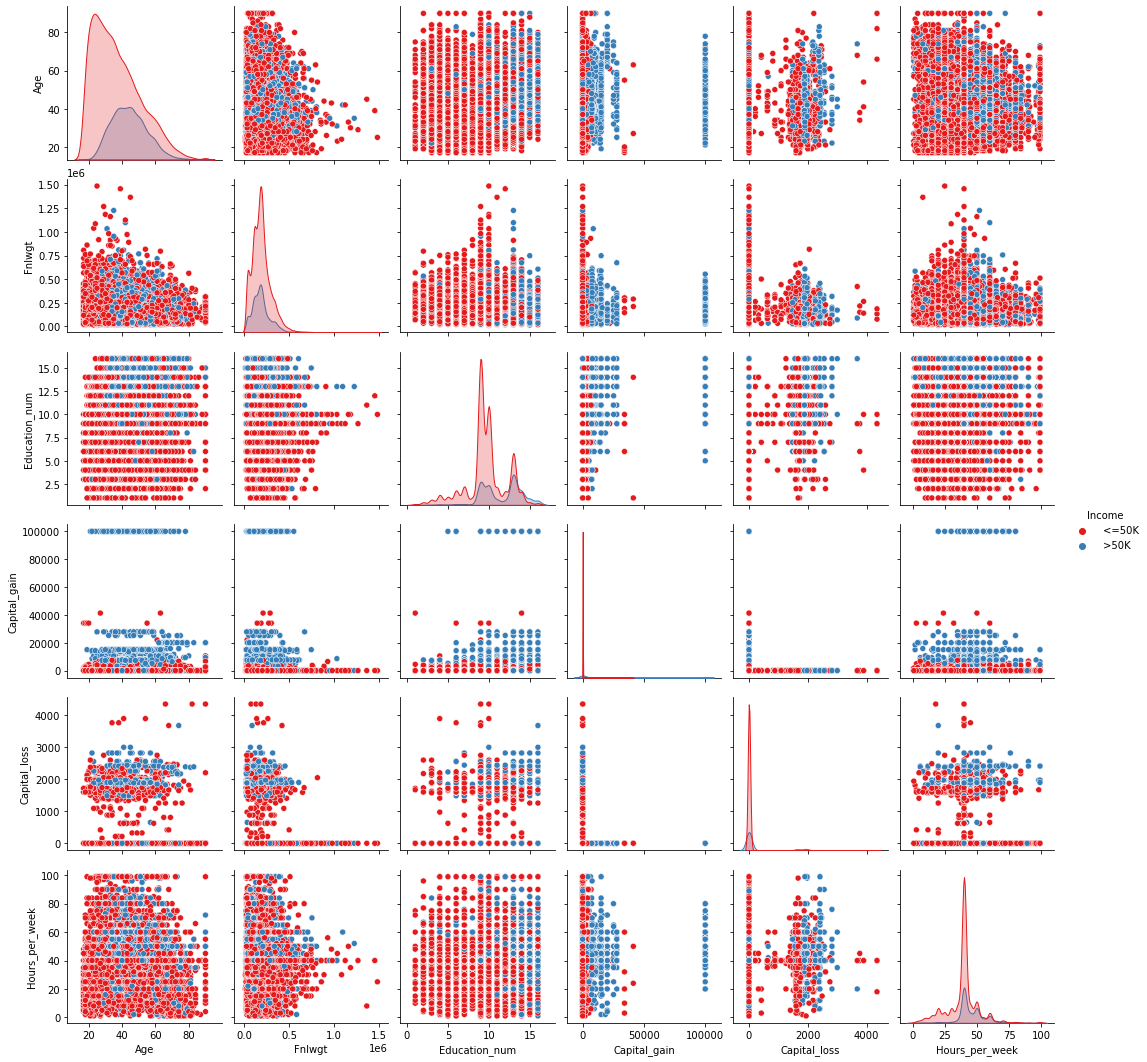

In [28]:
sns.pairplot(df,hue='Income',palette='Set1')
plt.show()

<Figure size 1440x1080 with 0 Axes>

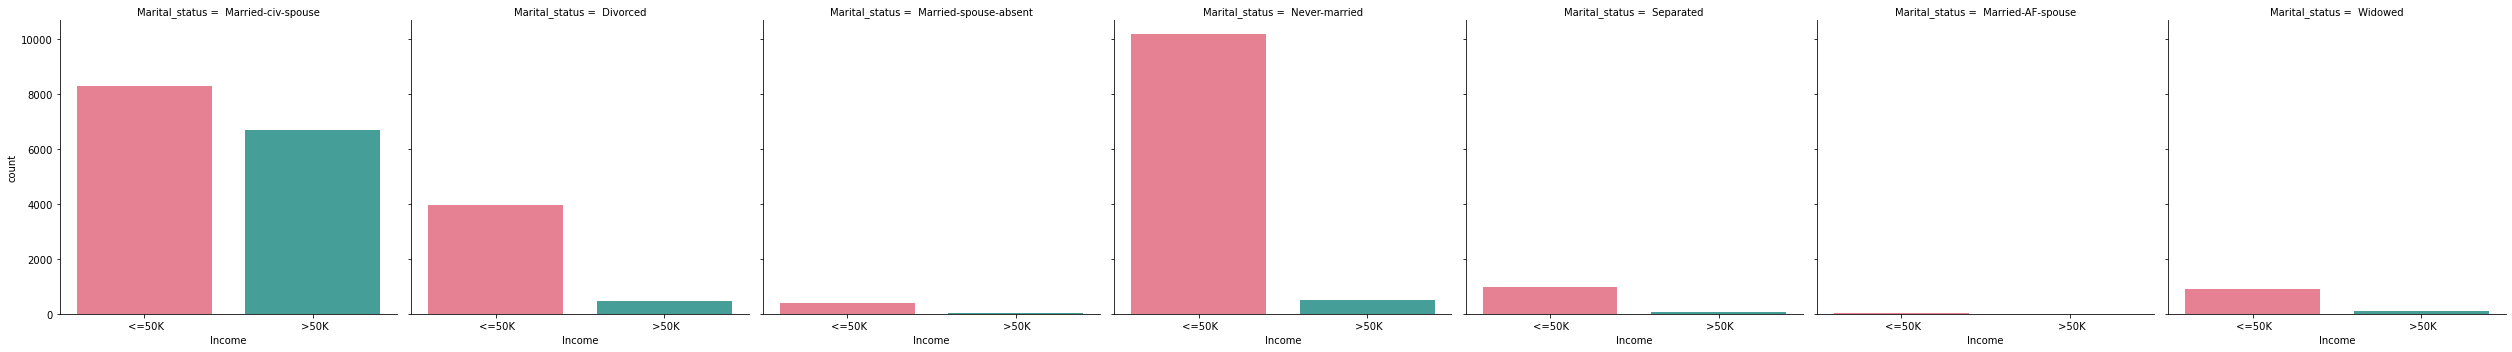

In [29]:
plt.figure(figsize=(20,15))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="husl")
plt.show()

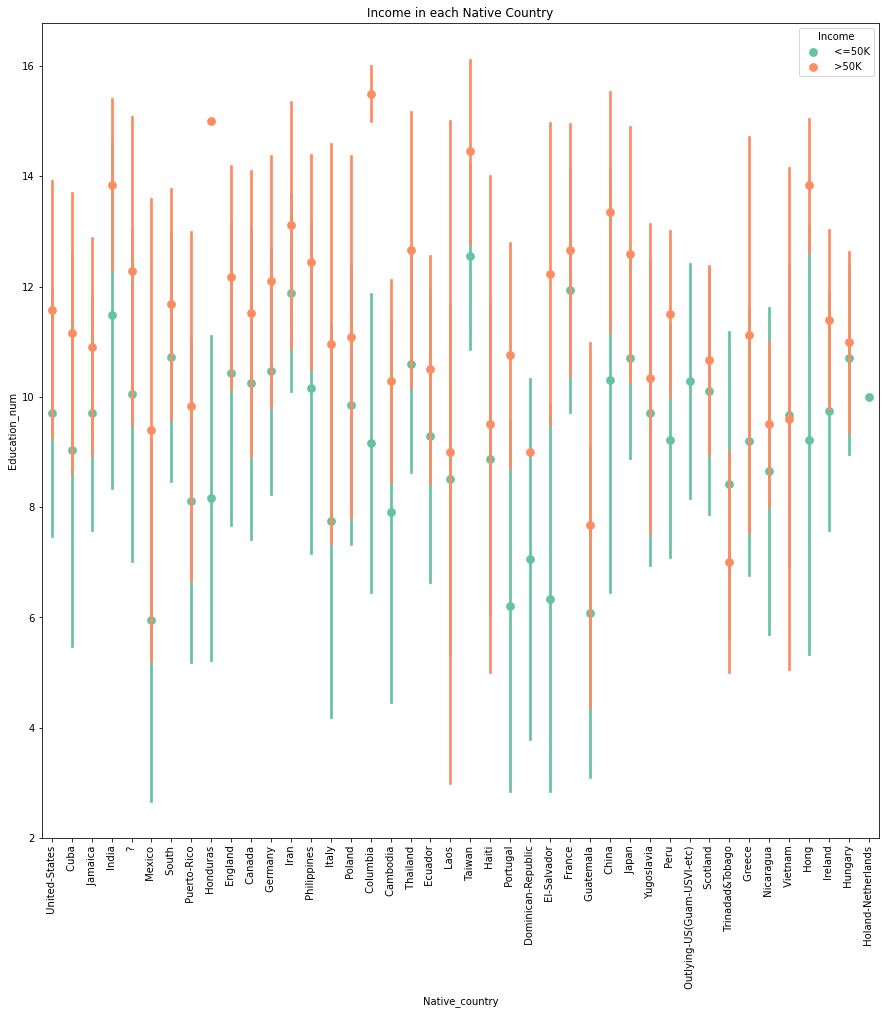

In [30]:
plt.figure(figsize=(15,15))
plt.title("Income in each Native Country")
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

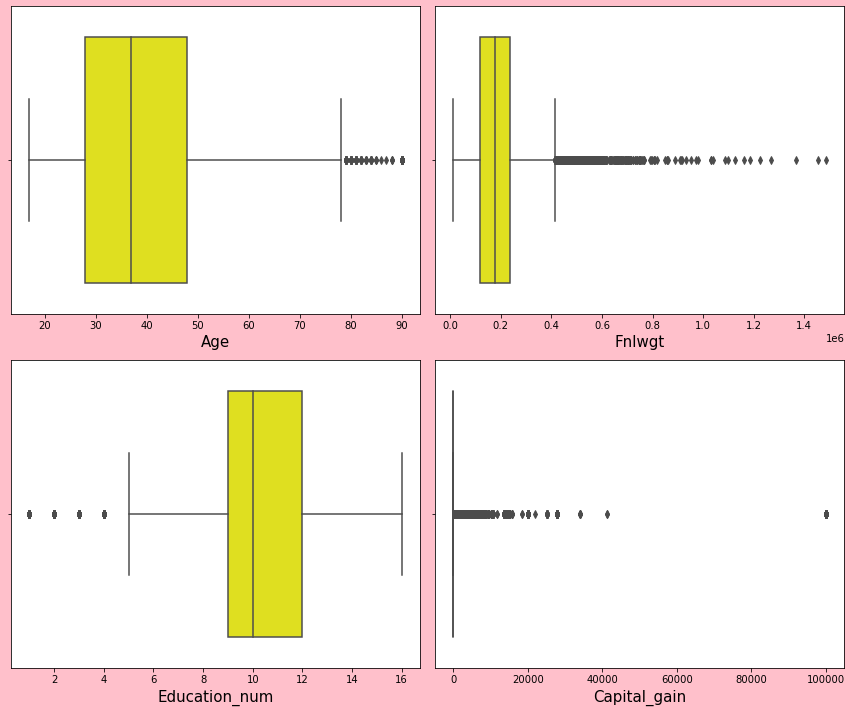

In [31]:
plt.figure(figsize=(12,10),facecolor='pink')
plotnumber=1
for column in df_nc:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color="yellow")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [32]:
f = df[["Age","Fnlwgt","Education_num","Hours_per_week"]]
z=np.abs(zscore(f))
z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.836961,1.008703,1.134817,2.222450
1,0.042934,0.245008,0.420646,0.035664
2,1.056935,0.425720,1.198377,0.035664
3,0.776180,1.408036,1.134817,0.035664
4,0.116259,0.898091,1.523683,0.035664
...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.197648
32556,0.103715,0.335469,0.420646,0.035664
32557,1.423558,0.358812,0.420646,0.035664
32558,1.216128,0.110897,0.420646,1.655506


In [33]:
df1 = df[(z<3).all(axis=1)] 
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


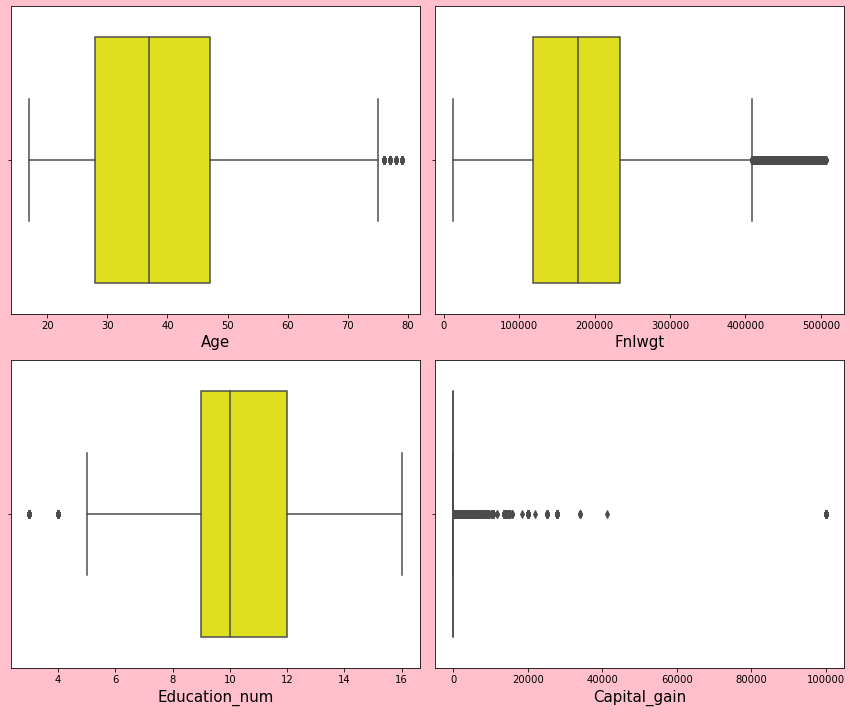

In [34]:
plt.figure(figsize=(12,10),facecolor='pink')
plotnumber=1
for column in df_nc:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df1[column],color="yellow")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [35]:
df.shape

(32536, 15)

In [36]:
df1.shape

(31442, 15)

In [37]:
Data_loss=((32536-31442)/32536)*100
Data_loss

3.362429309073027

In [38]:
Q1=f.quantile(0.25)
Q3=f.quantile(0.75)
IQR=Q3 - Q1
iqrdf=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
iqrdf.shape

(21936, 15)

In [39]:
Data_loss=((32536-21936)/32536)*100
Data_loss

32.579296778952546

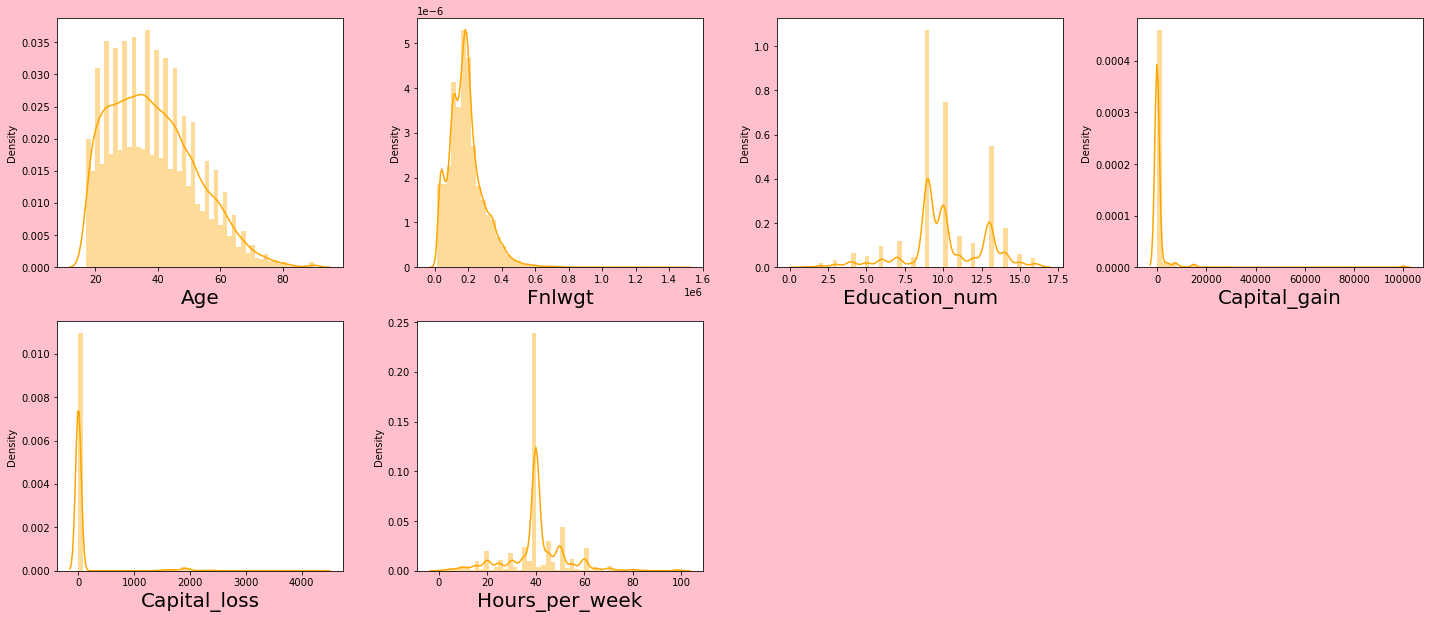

In [40]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1
for column in df_nc:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="orange")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [41]:
df1.skew()

Age                0.472290
Fnlwgt             0.635776
Education_num     -0.159303
Capital_gain      11.966294
Capital_loss       4.551825
Hours_per_week    -0.340717
dtype: float64

In [42]:
df1.skew().sort_values(ascending=False)

Capital_gain      11.966294
Capital_loss       4.551825
Fnlwgt             0.635776
Age                0.472290
Education_num     -0.159303
Hours_per_week    -0.340717
dtype: float64

In [43]:
ff = ['Capital_gain', 'Capital_loss','Fnlwgt']

In [44]:
sk = PowerTransformer(method='yeo-johnson')

In [45]:
df1[ff] = sk.fit_transform(df1[ff].values)
df1[ff].head()

,Capital_gain,Capital_loss,Fnlwgt
0,-0.301438,-0.221937,-1.114219
1,-0.301438,-0.221937,0.427172
2,-0.301438,-0.221937,0.607275
3,-0.301438,-0.221937,1.487480
4,-0.301438,-0.221937,1.048834


In [46]:
df1.skew().sort_values(ascending=False)

Capital_loss      4.284061
Capital_gain      3.016136
Age               0.472290
Fnlwgt           -0.034376
Education_num    -0.159303
Hours_per_week   -0.340717
dtype: float64

In [47]:
df1['Capital_gain'] = np.log1p(df1["Capital_gain"])

In [48]:
df1.skew().sort_values(ascending=False)

Capital_loss      4.284061
Capital_gain      3.016136
Age               0.472290
Fnlwgt           -0.034376
Education_num    -0.159303
Hours_per_week   -0.340717
dtype: float64

In [49]:
scaler = PowerTransformer(method='yeo-johnson')
df1['Capital_gain'] = scaler.fit_transform(df1['Capital_gain'].values.reshape(-1,1))

In [50]:
df1.skew().sort_values(ascending=False)

Capital_loss      4.284061
Capital_gain      3.016136
Age               0.472290
Fnlwgt           -0.034376
Education_num    -0.159303
Hours_per_week   -0.340717
dtype: float64

In [51]:
df1["Capital_gain"] = np.cbrt(df1["Capital_gain"])

In [52]:
df1.skew().sort_values(ascending=False)

Capital_loss      4.284061
Capital_gain      3.016136
Age               0.472290
Fnlwgt           -0.034376
Education_num    -0.159303
Hours_per_week   -0.340717
dtype: float64

In [53]:
df1=df1.drop(['Capital_loss', 'Capital_gain'],axis=1)

In [54]:
df1

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,-1.114219,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,0.427172,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,0.607275,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,1.487480,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,1.048834,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,0.812065,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,-0.207358,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,-0.235086,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,0.288773,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [55]:
df_nc=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!='object':
        df_nc.append(i)
print(df_nc)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


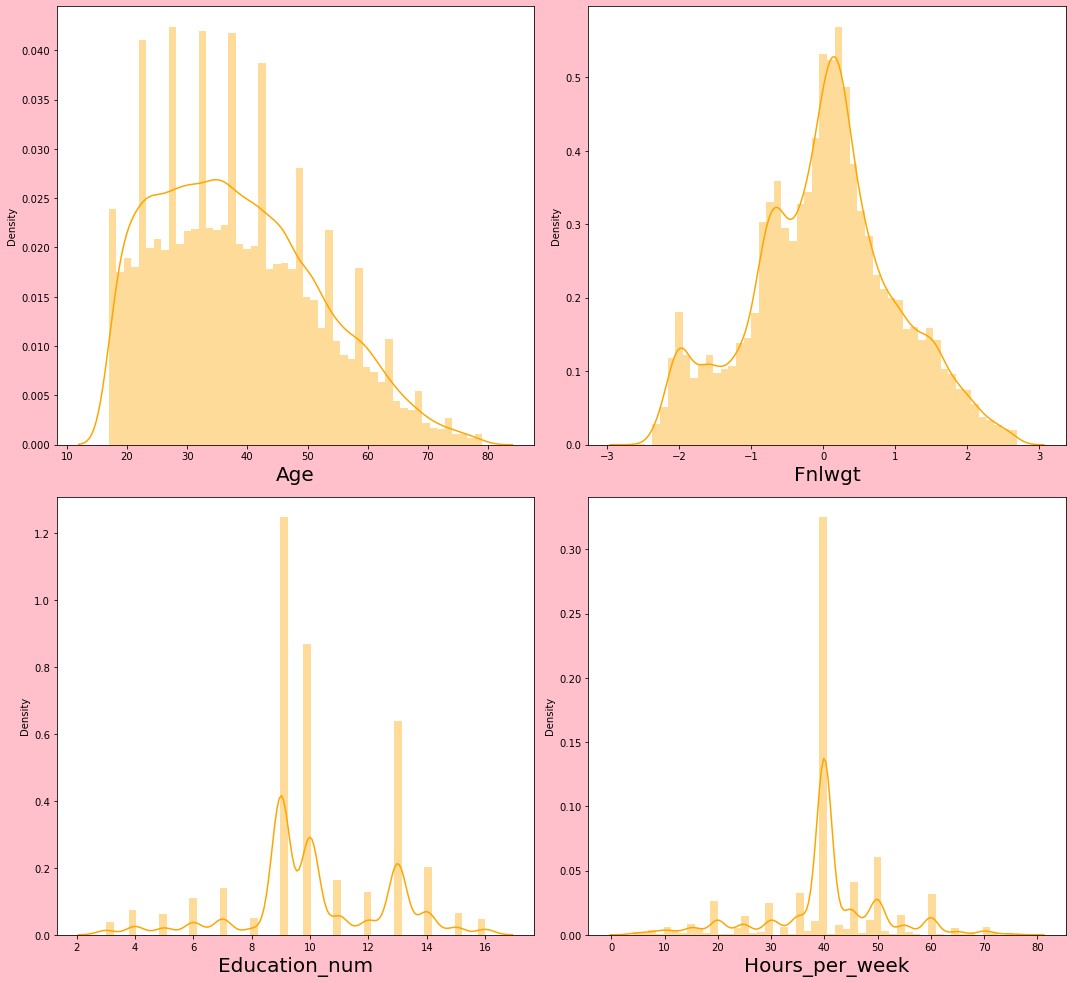

In [56]:
plt.figure(figsize=(15,20),facecolor='pink')
plotnumber=1
for column in df_nc:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df1[column],color="orange")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [57]:
df_cc

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [58]:
le=LabelEncoder()
df1[df_cc]= df1[df_cc].apply(le.fit_transform)
df1[df_cc]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,6,8,2,4,0,4,1,39,0
1,4,10,0,6,1,4,1,39,0
2,4,1,2,6,0,2,1,39,0
3,4,8,2,10,5,2,0,5,0
4,4,11,2,4,5,4,0,39,0
...,...,...,...,...,...,...,...,...,...
32555,4,6,2,13,5,4,0,39,0
32556,4,10,2,7,0,4,1,39,1
32557,4,10,6,1,4,4,0,39,0
32558,4,10,4,1,3,4,1,39,0


In [59]:
corr = df1.corr()
corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.013836,-0.066464,-0.000284,0.053365,-0.286105,-0.013594,-0.268033,0.030646,0.091687,0.097148,-0.000855,0.248289
Workclass,0.013836,1.000000,-0.014227,0.023006,0.052667,-0.064289,0.248264,-0.090688,0.048351,0.095208,0.128809,-0.006389,0.051558
Fnlwgt,-0.066464,-0.014227,1.000000,-0.024081,-0.033439,0.027481,0.003445,0.008320,-0.008317,0.025406,-0.015655,-0.053326,-0.004677
Education,-0.000284,0.023006,-0.024081,1.000000,0.355997,-0.039211,-0.021620,-0.015222,0.015586,-0.024823,0.061843,0.057935,0.077568
Education_num,0.053365,0.052667,-0.033439,0.355997,1.000000,-0.065661,0.112605,-0.102662,0.030889,0.016791,0.160668,0.022490,0.337717
Marital_status,-0.286105,-0.064289,0.027481,-0.039211,-0.065661,1.000000,-0.009231,0.185709,-0.067520,-0.127402,-0.197411,-0.020985,-0.198372
Occupation,-0.013594,0.248264,0.003445,-0.021620,0.112605,-0.009231,1.000000,-0.076118,0.007334,0.080584,0.072084,-0.011756,0.074544
Relationship,-0.268033,-0.090688,0.008320,-0.015222,-0.102662,0.185709,-0.076118,1.000000,-0.115150,-0.583051,-0.263300,-0.005927,-0.251529
Race,0.030646,0.048351,-0.008317,0.015586,0.030889,-0.067520,0.007334,-0.115150,1.000000,0.088781,0.045393,0.142040,0.072467
Sex,0.091687,0.095208,0.025406,-0.024823,0.016791,-0.127402,0.080584,-0.583051,0.088781,1.000000,0.238892,-0.008167,0.216677


<AxesSubplot:>

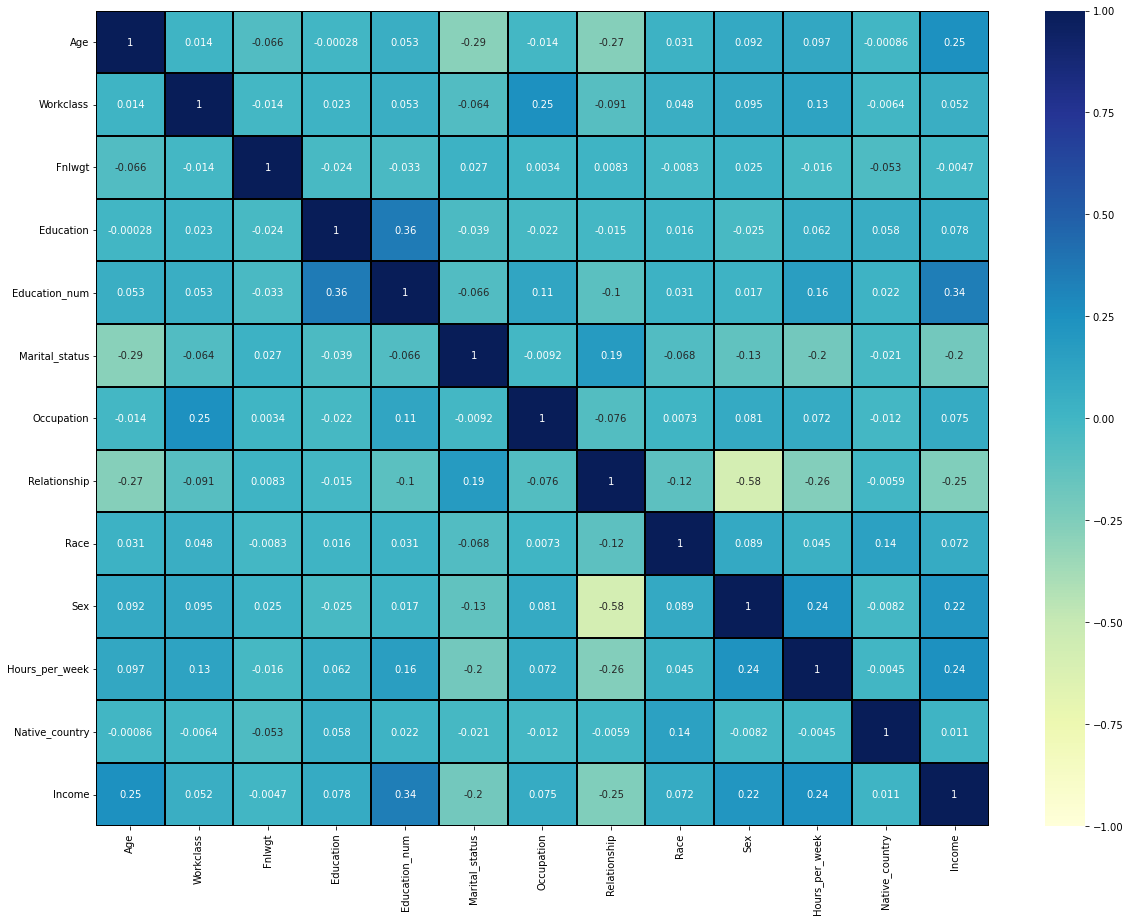

In [60]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")

In [61]:
corr['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337717
Age               0.248289
Hours_per_week    0.242352
Sex               0.216677
Education         0.077568
Occupation        0.074544
Race              0.072467
Workclass         0.051558
Native_country    0.010592
Fnlwgt           -0.004677
Marital_status   -0.198372
Relationship     -0.251529
Name: Income, dtype: float64

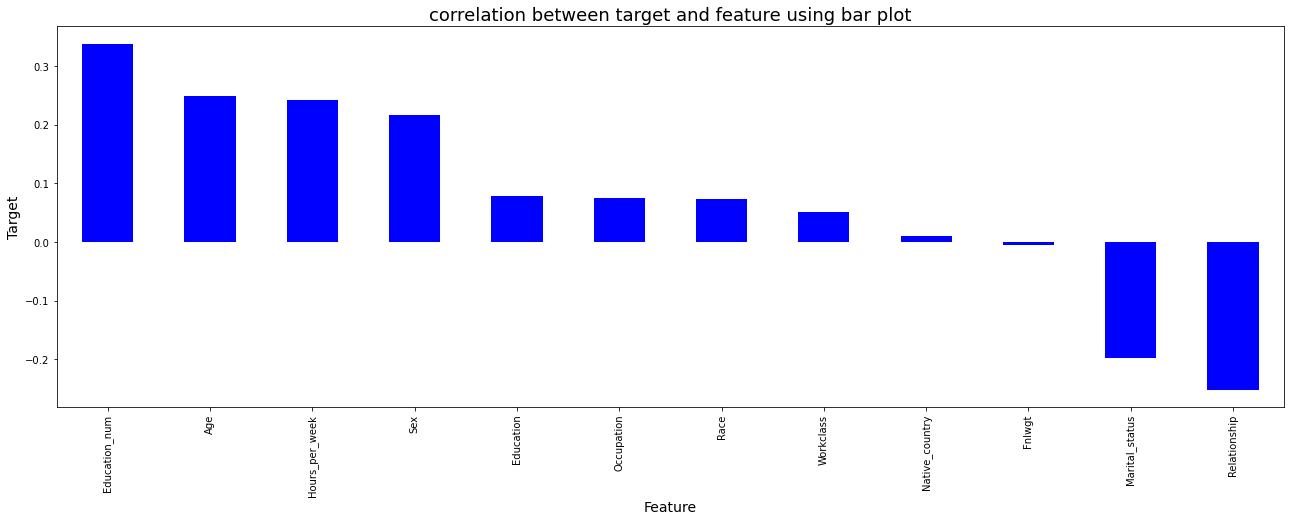

In [62]:
plt.figure(figsize=(22,7))
df1.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='blue')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between target and feature using bar plot',fontsize=18)
plt.show()

In [63]:
df1.drop('Fnlwgt',axis=1,inplace=True)

In [64]:
x = df1.drop("Income", axis=1)
y = df1["Income"]

In [65]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.874757,1.470833,-0.348130,1.154199,-0.403345,-0.609165,-0.903169,0.391337,0.706618,-2.424850,0.284918
1,-0.025630,0.089182,0.245965,-0.459834,-1.732763,-0.136499,-0.282026,0.391337,0.706618,-0.008621,0.284918
2,1.099853,0.089182,-2.427462,-1.266850,-0.403345,-0.136499,-0.903169,-1.969449,0.706618,-0.008621,0.284918
3,-0.775952,0.089182,-0.348130,1.154199,-0.403345,0.808833,2.202549,-1.969449,-1.415192,-0.008621,-4.109368
4,-0.100662,0.089182,0.543012,1.557707,-0.403345,-0.609165,2.202549,0.391337,-1.415192,-0.008621,0.284918
...,...,...,...,...,...,...,...,...,...,...,...
31437,-0.850984,0.089182,-0.942225,0.750690,-0.403345,1.517832,2.202549,0.391337,-1.415192,-0.187601,0.284918
31438,0.124435,0.089182,0.245965,-0.459834,-0.403345,0.099834,-0.903169,0.391337,0.706618,-0.008621,0.284918
31439,1.475014,0.089182,0.245965,-0.459834,2.255490,-1.318164,1.581405,0.391337,-1.415192,-0.008621,0.284918
31440,-1.226145,0.089182,0.245965,-0.459834,0.926072,-1.318164,0.960262,0.391337,0.706618,-1.798420,0.284918


In [66]:
y.value_counts()

0    23836
1     7606
Name: Income, dtype: int64

In [67]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [68]:
y.value_counts()

0    23836
1    23836
Name: Income, dtype: int64

In [69]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.172062,Age
1,1.072162,Workclass
2,1.093146,Education
3,1.175411,Education_num
4,1.149228,Marital_status
5,1.079833,Occupation
6,2.010415,Relationship
7,1.047611,Race
8,1.871382,Sex
9,1.188306,Hours_per_week


In [70]:
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lrpred=lr.predict(x_test)
    acc=accuracy_score(y_test,lrpred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.7561879457418543 on random state   34


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=67)

In [73]:
x_train

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
27727,0.949789,0.780008,-0.942225,0.750690,-0.403345,1.281499,-0.903169,0.391337,0.706618,1.781178,0.284918
29802,1.174885,0.089182,-0.348130,1.154199,-0.403345,-0.609165,-0.903169,0.391337,0.706618,-0.008621,0.284918
3188,-1.001048,0.089182,1.137107,-0.056326,0.926072,0.336167,1.581405,-1.969449,-1.415192,-0.008621,0.284918
37595,1.319566,0.089182,0.634258,1.681654,0.926072,1.136307,-0.282026,0.391337,-1.415192,0.713720,0.284918
29427,0.274499,0.089182,-1.833367,-2.880883,-0.403345,-0.845498,-0.903169,0.391337,0.706618,1.781178,0.284918
...,...,...,...,...,...,...,...,...,...,...,...
13193,-0.625887,0.089182,-0.348130,1.154199,-0.403345,-1.318164,2.202549,0.391337,-1.415192,-0.008621,0.284918
31705,1.995422,-1.983295,1.129955,-0.059564,-0.403345,-0.611062,-0.903169,-1.969449,0.706618,-0.008621,0.284918
43015,0.581772,0.089182,-0.645177,0.347182,-0.403345,-0.609165,-0.903169,0.391337,0.706618,0.724340,0.284918
1738,0.874757,-1.983295,0.245965,-0.459834,-0.403345,-1.318164,-0.903169,0.391337,0.706618,-0.008621,0.284918


In [74]:
x_test

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
18943,0.949789,0.089182,0.245965,-0.459834,-1.732763,1.281499,1.581405,0.391337,-1.415192,0.259849,0.284918
22708,-0.550855,-1.292469,-0.348130,1.154199,-0.403345,0.808833,-0.903169,0.391337,0.706618,-0.008621,0.284918
22250,-0.400791,-1.983295,-0.942225,0.750690,-1.732763,-0.609165,1.581405,0.391337,0.706618,0.886279,0.284918
23454,0.199467,0.089182,1.137107,-0.056326,-0.403345,-0.609165,-0.903169,0.391337,0.706618,0.886279,0.284918
14974,-1.151112,-2.674120,-0.942225,0.750690,0.926072,-1.554497,0.960262,-3.149842,0.706618,-2.156380,-0.878275
...,...,...,...,...,...,...,...,...,...,...,...
18903,-1.076080,2.161659,1.137107,-0.056326,0.926072,-1.318164,0.960262,0.391337,-1.415192,-0.008621,0.284918
15152,1.625079,1.470833,0.245965,-0.459834,1.590781,0.336167,-0.282026,-1.969449,0.706618,0.886279,0.284918
23908,-1.376209,-2.674120,0.245965,-0.459834,0.926072,-1.554497,0.960262,0.391337,0.706618,-2.514340,0.284918
12997,1.249918,1.470833,0.245965,-0.459834,-0.403345,1.281499,-0.903169,0.391337,0.706618,-0.008621,0.284918


In [75]:
y_train

27727    0
29802    1
3188     0
37595    1
29427    0
        ..
13193    0
31705    1
43015    1
1738     1
21301    0
Name: Income, Length: 33370, dtype: int64

In [76]:
y_test

18943    0
22708    1
22250    1
23454    1
14974    0
        ..
18903    0
15152    0
23908    0
12997    0
31805    1
Name: Income, Length: 14302, dtype: int64

In [77]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (33370, 11)
x_test shape = (14302, 11)
y_train shape = (33370,)
y_test shape = (14302,)


In [78]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [79]:
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [80]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.7551391413788281
[[5265 1880]
 [1622 5535]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      7145
           1       0.75      0.77      0.76      7157

    accuracy                           0.76     14302
   macro avg       0.76      0.76      0.76     14302
weighted avg       0.76      0.76      0.76     14302

####################################################################################################
Accuracy score of  GaussianNB() is
0.7721297720598518
[[5321 1824]
 [1435 5722]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.77      7145
           1       0.76      0.80      0.78      7157

    accuracy                           0.77     14302
   macro avg       0.77      0.77      0.77     14302
weighted avg       0.77      0.77      0.77     14302

###########################################################################

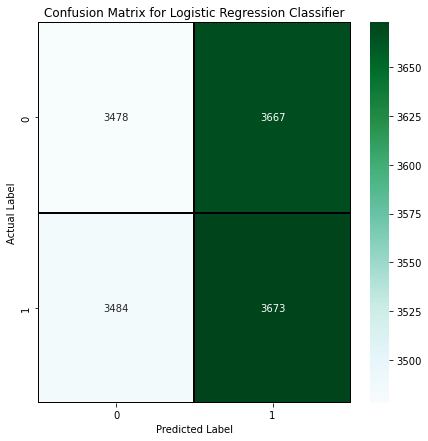

In [81]:
cm = confusion_matrix(y_test,lrpred)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", cmap="BuGn")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

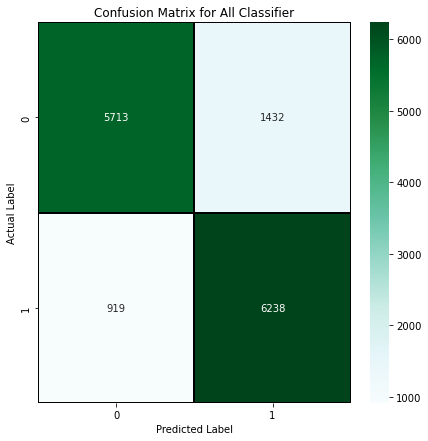

In [82]:
cm = confusion_matrix(y_test,predm)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", cmap="BuGn")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title('Confusion Matrix for All Classifier')
plt.show()

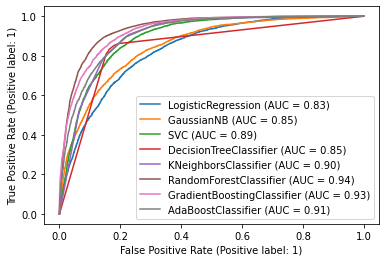

In [83]:
disp = plot_roc_curve(lr, x_test, y_test)
plot_roc_curve(gnb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(grb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(adb, x_test, y_test, ax = disp.ax_)
plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

In [84]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.7498112099345527
cross validation score of GaussianNB() is = 0.7627747944285954
cross validation score of SVC() is = 0.8156150360798792
cross validation score of DecisionTreeClassifier() is = 0.8206913911730156
cross validation score of KNeighborsClassifier() is = 0.828117133747273
cross validation score of RandomForestClassifier() is = 0.8612183252223528
cross validation score of GradientBoostingClassifier() is = 0.8429056888739721
cross validation score of AdaBoostClassifier() is = 0.8274878335291156
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.749748413901675
cross validation score of GaussianNB() is = 0.7632993171159983
cross validation score of SVC() is = 0.8168736983992732
cross validation score of DecisionTreeClassifier() is = 0.8226640353043878
cross validation score of KNeighborsClassifier() is

In [85]:
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=9,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [86]:
gcv1.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

In [87]:
final_model=gcv1.best_estimator_

In [91]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))

Test Accuracy score of final model = 0.8351279541322892
Train Accuracy score of final model = 0.8391669163919688


In [92]:
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

[[5713 1432]
 [ 919 6238]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      7145
           1       0.81      0.87      0.84      7157

    accuracy                           0.84     14302
   macro avg       0.84      0.84      0.84     14302
weighted avg       0.84      0.84      0.84     14302



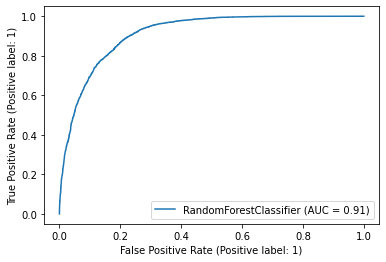

In [95]:
plot_roc_curve(final_model, x_test, y_test)
plt.show()

In [97]:
joblib.dump(final_model,"Census Income Project.pkl")

['Census Income Project.pkl']

In [98]:
Model = joblib.load("Census Income Project.pkl")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,0,0
1,1,1
2,1,0
3,1,1
4,0,0
...,...,...
14297,0,0
14298,0,0
14299,0,0
14300,0,1


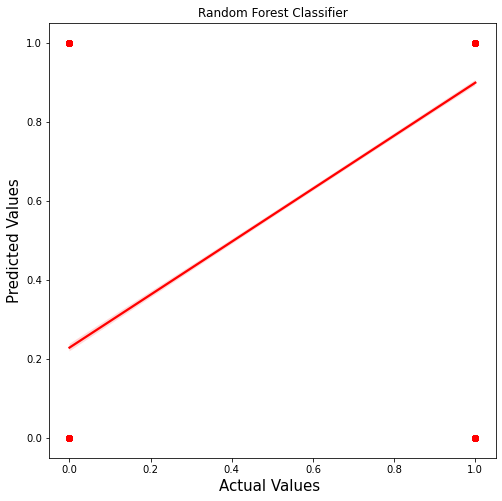

In [100]:
plt.figure(figsize=(8,8))
sns.regplot(y_test,prediction,color='r')
plt.xlabel('Actual Values ',fontsize=15)
plt.ylabel('Predicted Values',fontsize=15)
plt.title("Random Forest Classifier")
plt.show()